![Astrofisica Computacional](../logo.PNG)

---
## Perceptrons 


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

## 01. A Linear Perceptron

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data01.csv', index_col=0)
data

,x,y,phi
0,73.517682,44.800793,1116.826387
1,32.756284,28.724427,1066.212487
2,-13.308013,2.458485,490.735354
3,62.884936,5.696075,-1130.689639
4,47.861635,29.955114,782.448037
...,...,...,...
166,84.174447,7.278451,-1540.365854
167,-23.119203,9.013067,1145.697153
168,-5.747350,18.067861,1308.279480
169,16.419795,12.980806,450.696513


In [102]:
X_train = np.asarray([data['x'], data['y']])
X_train = X_train.T

y_train = np.asarray(data['phi'])

X_train.shape, y_train.shape

((171, 2), (171,))

In [107]:
class perceptron:
    def __init__(self):
        np.random.seed(413)
        self.w = np.random.rand(2)*10
        self.bias = np.random.rand()*10
        
    def predict(self, X):
        return np.dot(X, self.w) + self.bias
    
    def fC(self, X, y):
        yp = self.predict(X)
        return sum((yp - y)**2)
    
    def grad_fC(self,X, y):
        yp = self.predict(X)
        grad_w0 = sum(2*(yp-y)*X[:,0])
        grad_w1 = sum(2*(yp-y)*X[:,1])
        return [grad_w0, grad_w1, sum(2*(yp - y))]
    
    def improve(self,X,y):
        alpha_w = 1e-7# Learning Rate
        alpha_b = 1e-6# Learning Rate
        self.w[0] -= alpha_w*self.grad_fC(X,y)[0]
        self.w[1] -= alpha_w*self.grad_fC(X,y)[1]
        self.bias -= alpha_b*self.grad_fC(X,y)[2]
        
    def train(self, X, y, epochs):
        self.history = np.zeros(epochs)
        for i in range(epochs):
            self.history[i] = self.fC(X,y)
            self.improve(X,y)

In [108]:
p = perceptron()

epochs = 70000
p.train(X_train, y_train, epochs)

history = p.history
print('initial cost = ', history[0])
print(f'final cost after {epochs:.0f} epochs = ', history[-1])

initial cost =  415226788.1077046
final cost after 70000 epochs =  0.000895913543317495


In [109]:
p.w, p.bias

(array([-23.99997533,  64.00011851]), 13.995003811770468)

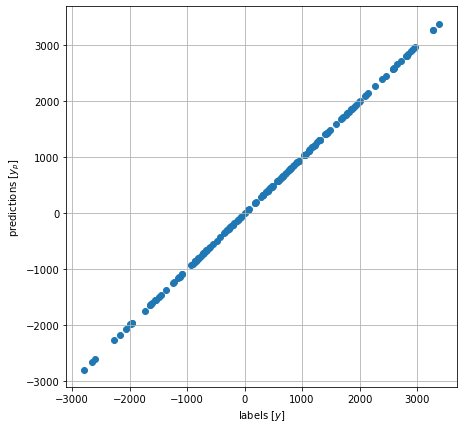

In [114]:
predictions = p.predict(X_train)

plt.figure(figsize=(7,7))
plt.scatter(y, predictions)
plt.xlabel(r'labels $[y]$')
plt.ylabel(r'predictions $[y_p]$')
plt.grid()
plt.show()

---
## A Non-Linear Perceptron

In [115]:
data = pd.read_csv('data02.csv', index_col=0)
data

,x,psi
0,48.517682,3813.612730
1,7.756284,-40.293225
2,-38.308013,3603.551985
3,37.884936,2167.607856
4,22.861635,612.799280
...,...,...
195,70.160036,8560.980559
196,-20.880126,1226.801640
197,69.542900,8399.657767
198,-34.494058,2979.573084


In [116]:
X_train = np.asarray(data['x'])
y_train = np.asarray(data['psi'])

X_train.shape, y_train.shape

((200,), (200,))

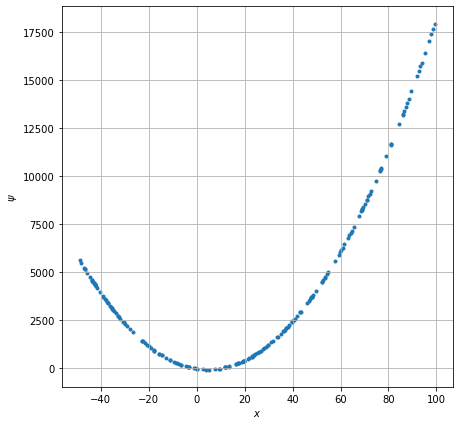

In [120]:
plt.figure(figsize=(7,7))
plt.scatter(X_train, y_train, marker='.')
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi$')
plt.grid()
plt.show()

In [138]:
X_train = np.asarray([data['x']**2, data['x']])
X_train = X_train.T
y_train = np.asarray(data['psi'])

X_train.shape, y_train.shape

((200, 2), (200,))

In [174]:
class perceptron:
    def __init__(self):
        np.random.seed(413)
        self.w = np.random.rand(2)*10
        self.bias = np.random.rand()*10
        
    def predict(self, X):
        return np.dot(X, self.w) + self.bias
    
    def fC(self, X, y):
        yp = self.predict(X)
        return sum((yp - y)**2)
    
    def grad_fC(self,X, y):
        yp = self.predict(X)
        grad_w0 = sum(2*(yp-y)*X[:,0])
        grad_w1 = sum(2*(yp-y)*X[:,1])
        return [grad_w0, grad_w1, sum(2*(yp - y))]
    
    def improve(self,X,y):
        alpha_w = 1e-10# Learning Rate
        alpha_b = 1e-7# Learning Rate
        self.w[0] -= alpha_w*self.grad_fC(X,y)[0]
        self.w[1] -= alpha_w*self.grad_fC(X,y)[1]
        self.bias -= alpha_b*self.grad_fC(X,y)[2]
        
    def train(self, X, y, epochs):
        self.history = np.zeros(epochs)
        for i in range(epochs):
            self.history[i] = self.fC(X,y)
            self.improve(X,y)

In [175]:
p = perceptron()

epochs = 120000
p.train(X_train, y_train, epochs)

history = p.history
print('initial cost = ', history[0])
print(f'final cost after {epochs:.0f} epochs = ', history[-1])

initial cost =  52741589641.44609
final cost after 120000 epochs =  67247.59234498623


In [176]:
p.w, p.bias

(array([  1.99072647, -17.5422363 ]), 0.010001280692262008)

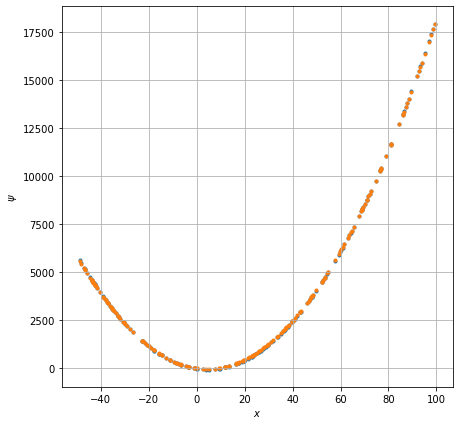

In [177]:
yp = p.predict(X_train)

plt.figure(figsize=(7,7))
plt.scatter(X_train[:,1], y_train, marker='.')
plt.scatter(X_train[:,1], yp, marker='.')
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi$')
plt.grid()
plt.show()